# Data Mining: Cluster Analysis

Data Mining is the investigation of data to find patterns and discover otherwise unknown relationships within the data. It usually invovles a combination of human intervention/intelligence and the use of any number of computer algorithms. The intelligent human, with the aid of the comptuer algorithms, may pour over the data for many days trying to spot patterns and draw conclusions from the data.

Many of the common data mining alogorithms are also used for machine learning. But technically, data mining and machine learning are ***not*** the same thing. The difference is that data mining analyzes the data without making future predictions. Machine learning analyzes the data and then makes a prediction about what will happen in the future.

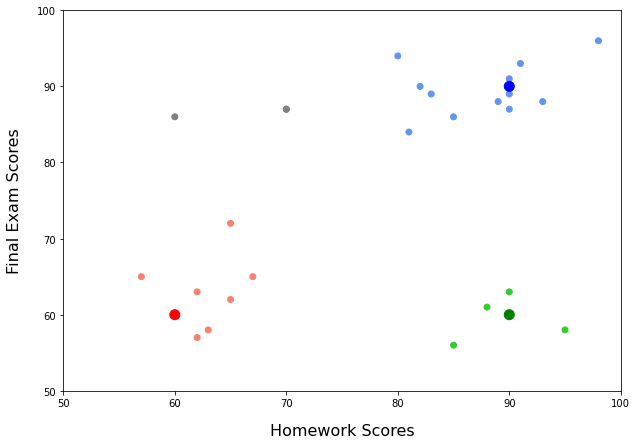

For this chapter, we will be exploring a type of data mining called Cluster Analysis. There are different algorithms to help with Cluster Analysis, but the one that we are implementing is called "K-Means". The term "K" refers to a number and the term "Means" is the statistical word for averages. So we will be calculating some number $k$ of averages. K-Means is an algorithm that is used for data mining and machine learning. But we will be restricting our work to Data Mining.

## 7.3 Cluster Analysis: A Simple Example

Starting on page 222

As our book explains, "Cluster Analysis is a data mining tecnique that attempts to divide the data into meaningful groups called clusters. These clusters represent data values that show some kind of similarity to one another while exhibiting a dissiimlar relatipnship to data values outside of the cluster."

Most of the data that data mining analyzes is very complicated. Each record in the data will have many dimensions, many features that must be evaluated. For example, if we were examining network logs, each record would list the IP addresses, the port numbers, the number of bytes sent and received, and so on and so forth. All of this information would be difficult to graph because it would have so many dimensions. Because of this, we will be looking at very simple data: the performance of fictional students on homework assignments and tests.

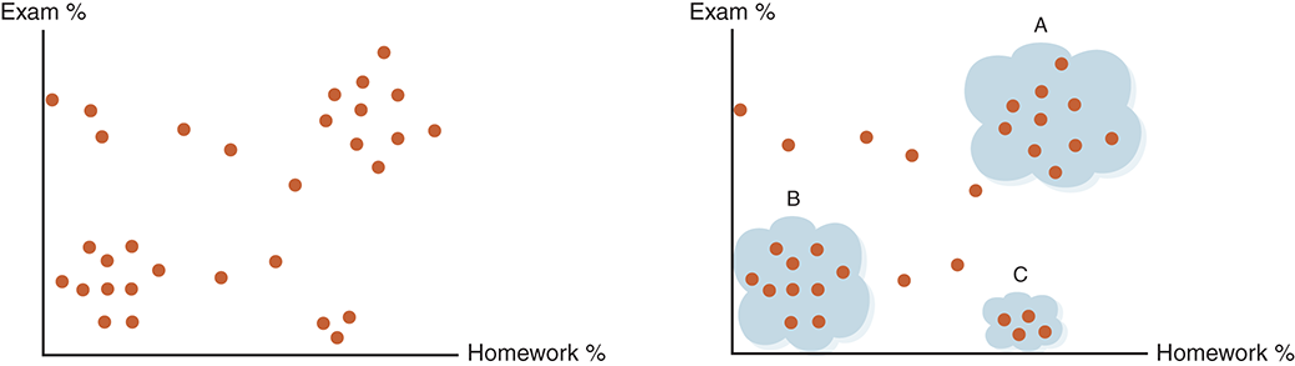

We will be looking at 2D data because this type of data is easy to visualize on an xy-graph. For example, in analyzing the performance of students, the two dimensions are a variable showing how a student performs on exams (grade %) and a variable showing how well a student performs on homework assignments (grade %). But the techniques that we develop can be applied to much larger problems with many dimensions.

In [ ]:
student_grades = {"Alice":(93, 88), "Bob":(55, 55), "Charles":(90, 87), "Dave":(62,57), "Ellen":(89,88), 
                  "Frita":(90,91), "Grant":(70,87), "Heidi":(98,96), "Isabelle":(70,87), "Jack":(80,94), 
                  "Kate":(60,86), "Lisa":(85,86), "Mary":(90,89), "Nancy":(63,58), "Orville":(88,61),
                  "Peter":(95,58), "Quinton":(83,89), "Ralph":(57,65), "Sally":(67,65), "Trent":(62,63),
                  "Ursala":(65,53), "Violet":(82,90), "Wally":(91,93), "Xavier":(81, 84), "Yolanda":(90, 63),
                  "Zack":(85,56)}

### Manually Investigate Data

Before starting with Cluster Analysis, let's just perform a little analysis by hand using matplotlib. Let's see if we can find any patterns in the data.

In [ ]:
hmwks = [v[0] for v in student_grades.values()]
exams = [v[1] for v in student_grades.values()]
print(hmwks[:5])
print(exams[:5])

In [ ]:
import matplotlib.pyplot as plt

ticks = [50, 60, 70, 80, 90, 100]

plt.figure(figsize=(10,7))
plt.scatter(hmwks, exams, color="orangered")
plt.xlabel("Homework Scores", fontsize=16, labelpad=15)
plt.ylabel("Final Exam Scores", fontsize=16, labelpad=15)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.show()

### Manually Identify Three Clusters

As the book points out, there seems to be three clusters of data here. These correspond to students who work hard on their homework and thus score well on their tests. Another cluster seems to correspond to students who do not complete their homework and therefore score poorly on the test. The final cluster is for students who study hard and complete all their work, but who have test anxiety and perform poorly on the exam.

In [ ]:
colors = []
for i in range(len(hmwks)):
    if hmwks[i] > 75 and exams[i] > 75:
        colors.append("cornflowerblue")
    elif hmwks[i] > 75 and exams[i] < 75:
        colors.append("limegreen")
    elif hmwks[i] < 75 and exams[i] < 75:
        colors.append("salmon")
    else:
        colors.append("gray")

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(hmwks, exams, c=colors)
plt.xlabel("Homework Scores", fontsize=16, labelpad=15)
plt.ylabel("Final Exam Scores", fontsize=16, labelpad=15)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.show()

### Manually Identify Three Centroids

We might identify each of the three clusters by creating a new point at the center of the cluster (we've just done a rough estimate here, so it's not quite at the true center). We call this point the centroid. Each cluster has a centroid. You can see it below.

In [ ]:
centroids = [(90, 90, "blue", 100), (90, 60, "green", 100), (60, 60, "red", 100)]
centroids_x = [t[0] for t in centroids]
centroids_y = [t[1] for t in centroids]
centroids_c = [t[2] for t in centroids]
centroids_s = [t[3] for t in centroids]

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(centroids_x, centroids_y, c=centroids_c, s=centroids_s)
plt.xlabel("Homework Scores", fontsize=16, labelpad=15)
plt.ylabel("Final Exam Scores", fontsize=16, labelpad=15)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.show()

### Manaual Analaysis: Data with Centroids

Of course it would be helpful to see the centroids plotted on the same graph as the data points.

Note that we have performed a decent manual analysis, we should consider what is different between our work and a Cluster Analysis algorithm like K-Means.

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(hmwks, exams, c=colors)
plt.scatter(centroids_x, centroids_y, c=centroids_c, s=centroids_s)
plt.xlabel("Homework Scores", fontsize=16, labelpad=15)
plt.ylabel("Final Exam Scores", fontsize=16, labelpad=15)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.show()

## 7.4 Implementing Cluster Analysis on Simple Data

### K-Means Cluster Analysis Algorithm

K-Means is an ***repetitive*** algorithm that creates clusters by assigning each of the individual data point to the centroid that it is closest to. That's pretty straightforward, right? But how do we know the best place to position each of the "K" centroids? Because if we put them in the wrong position, then the distances between the centroid and the individual points will produce the wrong results.

That's where the "k-means" comes in. Every time that we calculate the "k" clusters, we calculate a new position for the centroids by taking all of the data points in a cluster and then averaging them "means" to find a new center point for each cluster (the new centroid). Once we know the new centroid of each cluster, we reassign each of the data points to their closest centroid. This repeats over and over again until the centroids move into a stable position.

We'll need an algorithm to compute the distance between a point and a centroid...

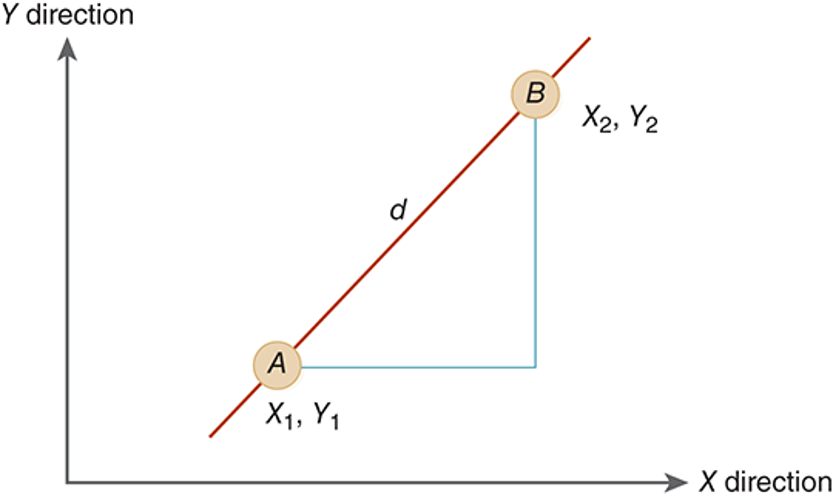

### Calculating Euclidian Distance

We will need to calculate the distance between two data points student1 (95% homework, 93% test) and a centroid (88% homework, 96% test). This distance is called the Euclidian Distance and can be calculated for points in an arbitrary number of dimensions.

$$d=\sqrt{(X_{2}-X_{1})^{2}+(Y_{2}-Y_{1})^{2}}$$

In [1]:
from math import sqrt

# EXERCISE: Write the function to calculate the Euclidian distance between two points
def EuclidDist(point1, point2):
    math.sqrt((point1[1]-point1[0])**2 + (point2[1]-point2[0])**2)
    return 

In [ ]:
EuclidDist((67,55), (23,44))

### Finding the Closest Centroid

Now that we've got an algorithm to calculate the Euclidian Distance between two points, let's use it to find the closest centroid for each data point.

We'll start with student *Alice*, along with our original three centroids.

In [ ]:
point = student_grades["Alice"]

centroid1 = (90, 90)
centroid2 = (90, 60)
centroid3 = (60, 60)
centroids = [centroid1, centroid2, centroid3]

# You should be able to spot which centroid this point is closest to
print("CENTROIDS: {}".format(centroids))
print("POINT:     {}".format(point))

In [ ]:
distance_to_centroid = []

# EXERCISE: Use the EuclidDist function to determine the distance from the point to each of the centroids...
#           the result should be a list containing three distances (one for each of the three centroids)



print(distance_to_centroid)

In [ ]:
# EXERCISE: Which centroid is closest? Get its index

min_distance = 
closest_indx = 
min_centroid = 

print("Point {} is closest to centroid #{} which is at location {}".format(point, closest_indx, min_centroid))

### FInd Closest Centroid Function

Although it's better for you and I to see the actual coordinates of the centroid, what we really want is the ***index*** of the centroid because we will be maintaining three parallel lists and the index is the key to all three of them. So let's combine the previous exercises into a function that returns the index of the closest function.

In [ ]:
def FindClosestCentroid(point, centroid_list):
    
    distance_to_centroid = []
    # Create a list of distances to each of the different centroids
    
    
    
        
    # Which centroid is closest? Get its index
    min_distance = 
    closest_indx = 
    min_centroid = 
    print("Point {} is closest to centroid #{} which is at location {}".format(point, closest_indx+1, min_centroid))
    
    return closest_indx

FindClosestCentroid(point2, centroids)

### Find Closest Centroid For Each and Every Data Point

Now that we've got the algorithm figured out, we need to use it to put each and every data point into it's appropriate cluster. We'll keep a list of all the data points in each cluster. We'll have as many clusters as we have centroids. The clusters and centroids will be in parallel lists.

In [ ]:
def InitEmptyClusters(k):
    clusters = []
    for i in range(k):
        clusters.append([])
    return clusters

In [ ]:
def AssignItemsToClosestCluster(data_list, centroid_list):
    
    # k should be the same as len(centroids)
    cluster_list = InitEmptyClusters(len(centroid_list))
        
    # Step through each of the items and calculate its closest centroid
    for key, data_point in data_list.items():

        # Add this item's key to the cluster whose centroid is closest...
        # ...this works because the 'centroid_list', 'distance_to_centroid', and 'cluster_list' are parallel
        closest_indx = FindClosestCentroid(data_point, centroid_list)
        cluster_list[closest_indx].append(key)
    
    return cluster_list

AssignItemsToClosestCluster(student_grades, centroids)